In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score



In [2]:
data = pd.read_csv("C:\\Users\\PALLAB\\Downloads\\tested.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df = data.drop(columns=["Name","PassengerId",'Ticket','Cabin'])
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

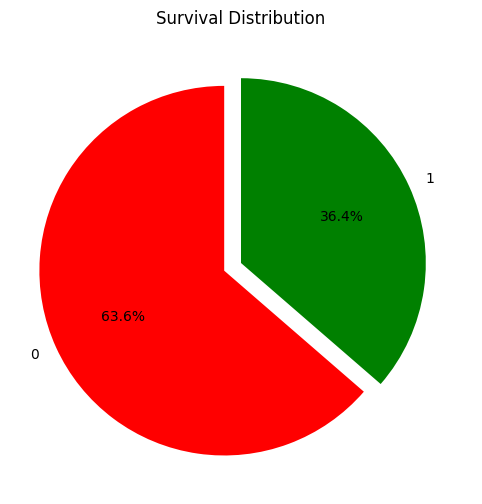

In [8]:
if 'Survived' in df.columns:
    plt.figure(figsize=(8, 6))
    data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['red','green'], explode=(0.1, 0))
    plt.title('Survival Distribution')
    plt.ylabel('')
    plt.show()

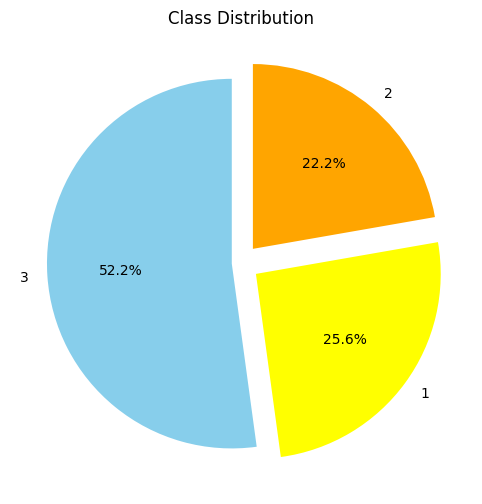

In [9]:
if 'Pclass' in df.columns:
    plt.figure(figsize=(8, 6))
    df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                          colors=['skyblue', 'yellow', 'orange'], 
                                          explode=(0.05, 0.1, 0.1))  # Matching the length of unique values
    plt.title('Class Distribution')
    plt.ylabel('')
    plt.show()

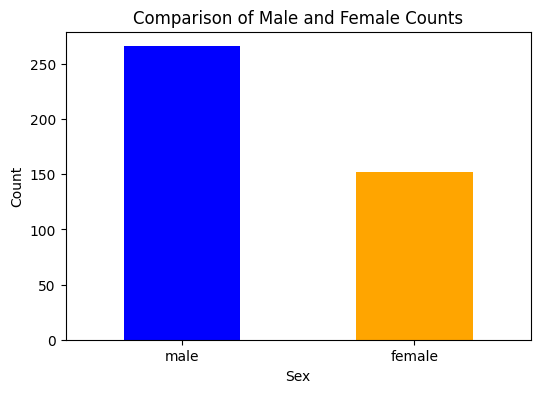

In [10]:
sex_counts = df['Sex'].value_counts()  # Count the occurrences of each category

# Plotting bar plot
plt.figure(figsize=(6, 4))
sex_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparison of Male and Female Counts')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

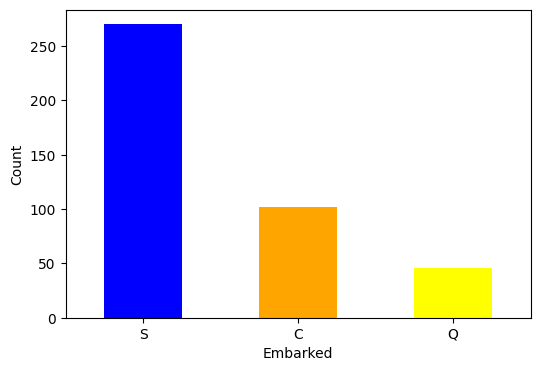

In [11]:
sex_counts = df['Embarked'].value_counts()  # Count the occurrences of each category

# Plotting bar plot
plt.figure(figsize=(6, 4))
sex_counts.plot(kind='bar', color=['blue', 'orange','yellow'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

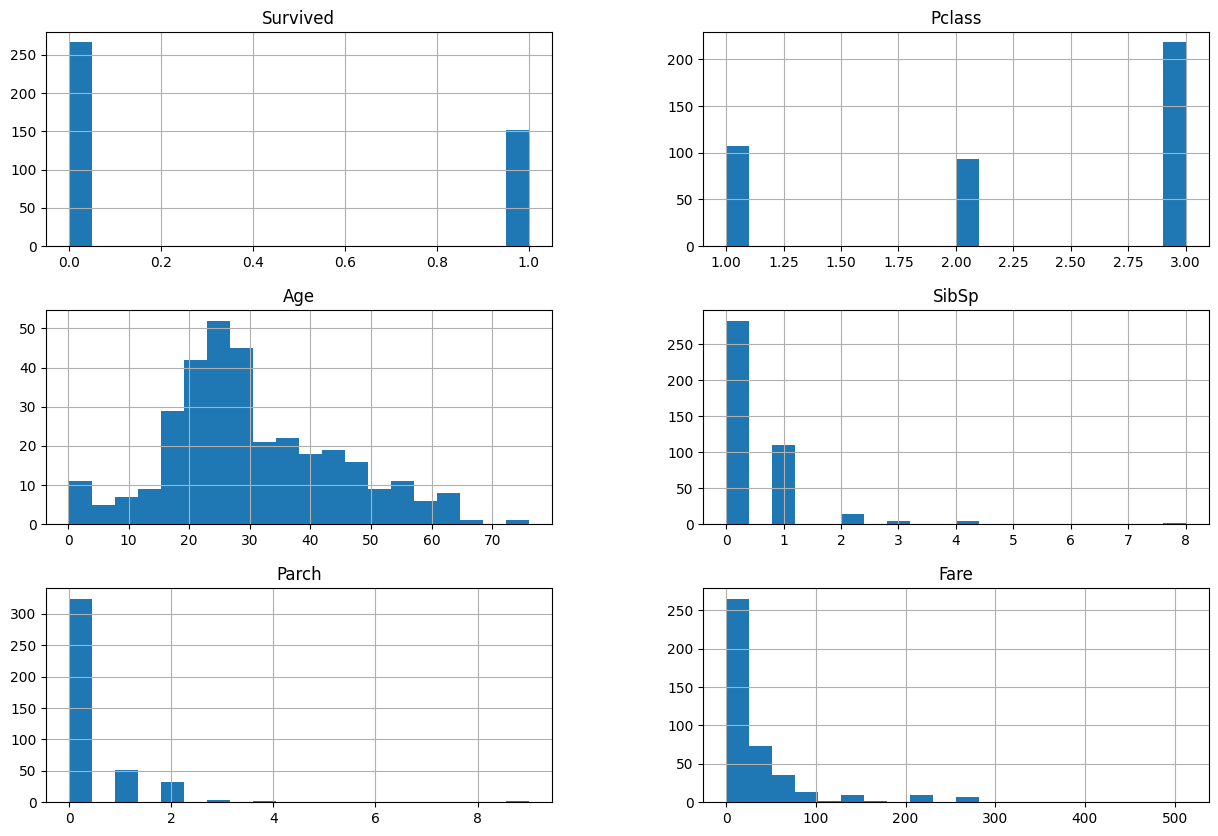

In [12]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [14]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [15]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


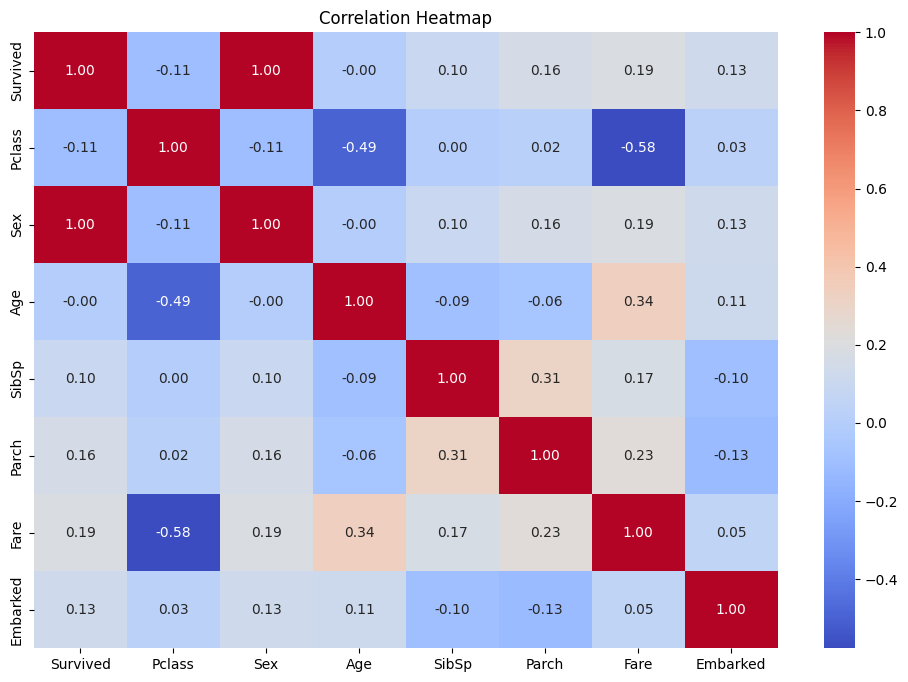

In [16]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
if 'Survived' in df.columns:
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']
else:
    raise ValueError("Target column 'Species' not found in the dataset.")

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [19]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [20]:
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

In [21]:

def evaluate_model(y_test, preds, model_name):
    print(f"{model_name} Model")
    print(f"R^2 Score: {r2_score(y_test, preds)}")
    print("Classification Report:")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, preds)
    print(cm)
    print("Accuracy Score:")
    print(accuracy_score(y_test, preds))
    print("\n")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Decision Tree Evaluation

Decision Tree Model
R^2 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Confusion Matrix:
[[85  0]
 [ 0 41]]
Accuracy Score:
1.0




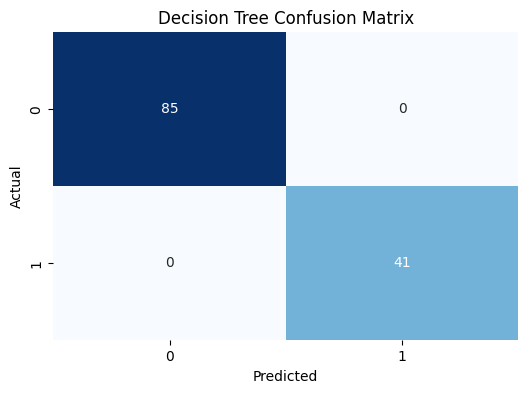

In [22]:

evaluate_model(y_test, dt_preds, "Decision Tree")

# Random Forest Evaluation

Random Forest Model
R^2 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Confusion Matrix:
[[85  0]
 [ 0 41]]
Accuracy Score:
1.0




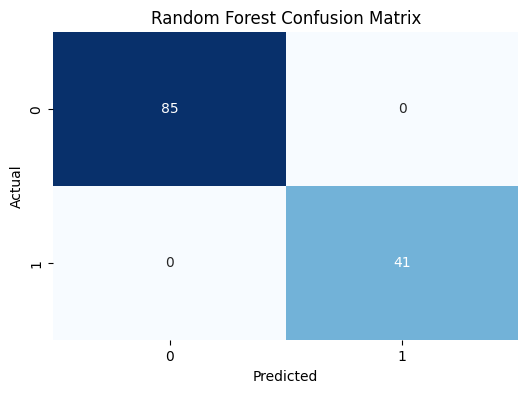

In [23]:

evaluate_model(y_test, rf_preds, "Random Forest")

# XGBoost Evaluation

XGBoost Model
R^2 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Confusion Matrix:
[[85  0]
 [ 0 41]]
Accuracy Score:
1.0




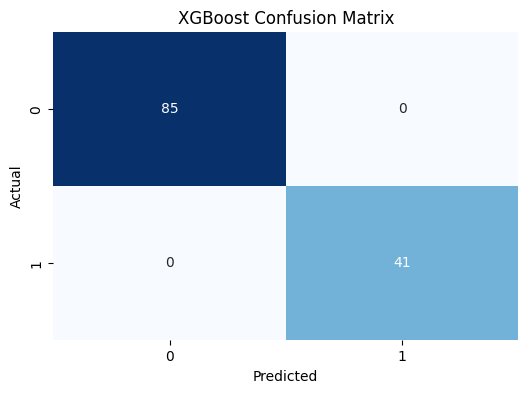

In [24]:

evaluate_model(y_test, xgb_preds, "XGBoost")